In [1]:
import numpy as np
import pulp as p
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from Data import Data
import pandas as pd
import itertools
from collections import Counter
import pickle
from sklearn.cluster import AgglomerativeClustering

In [85]:
#similarity is 18 to 18 matrix 
#it contains number of overlapping points between each cluster and each region 
#It is considered as the weight of corresponding edge.
n = 18

w = np.load("similarity15.npy")
x_axis_labels = np.load("x_axis_labels.npy")

if w.shape[0]<n:
    d = n - w.shape[0]
    w = np.r_[w, np.zeros((d,18))]

In [74]:
#Assigning a maximizing Linear Programming problem
prob = p.LpProblem("ClusterAssigment", p.LpMaximize)

In [75]:
#Create a binary variable
#It determines which edge should be included
#And which one should be eliminated
assign_vars = p.LpVariable.dicts("X",
                                 [(i, j) for i in range(n)
                                  for j in range(n)],
                                 0, 1, p.LpBinary)

#Objective function
#Maximizing the sum of weights of included links
prob += p.lpSum(w[i,j] * assign_vars[i,j] for i in range(n) for j in range(n))

#Constrains: There must be either one or zero link originating from a node
for j in range(n):
    prob += p.lpSum(assign_vars[i,j] for i in range(n)) == 1

#Constrains: There must be either one or zero link going to a node
for i in range(n):
    prob += p.lpSum(assign_vars[i,j] for j in range(n)) == 1
    
#Running the optimization
prob.solve()

1

In [76]:
#Result of "X"
for v in prob.variables():
    print(v.name,v.value())

X_(0,_0) 0.0
X_(0,_1) 0.0
X_(0,_10) 0.0
X_(0,_11) 0.0
X_(0,_12) 0.0
X_(0,_13) 0.0
X_(0,_14) 0.0
X_(0,_15) 0.0
X_(0,_16) 0.0
X_(0,_17) 0.0
X_(0,_2) 0.0
X_(0,_3) 1.0
X_(0,_4) 0.0
X_(0,_5) 0.0
X_(0,_6) 0.0
X_(0,_7) 0.0
X_(0,_8) 0.0
X_(0,_9) 0.0
X_(1,_0) 0.0
X_(1,_1) 0.0
X_(1,_10) 0.0
X_(1,_11) 0.0
X_(1,_12) 0.0
X_(1,_13) 1.0
X_(1,_14) 0.0
X_(1,_15) 0.0
X_(1,_16) 0.0
X_(1,_17) 0.0
X_(1,_2) 0.0
X_(1,_3) 0.0
X_(1,_4) 0.0
X_(1,_5) 0.0
X_(1,_6) 0.0
X_(1,_7) 0.0
X_(1,_8) 0.0
X_(1,_9) 0.0
X_(10,_0) 0.0
X_(10,_1) 0.0
X_(10,_10) 0.0
X_(10,_11) 0.0
X_(10,_12) 0.0
X_(10,_13) 0.0
X_(10,_14) 0.0
X_(10,_15) 0.0
X_(10,_16) 0.0
X_(10,_17) 0.0
X_(10,_2) 0.0
X_(10,_3) 0.0
X_(10,_4) 0.0
X_(10,_5) 0.0
X_(10,_6) 1.0
X_(10,_7) 0.0
X_(10,_8) 0.0
X_(10,_9) 0.0
X_(11,_0) 0.0
X_(11,_1) 0.0
X_(11,_10) 0.0
X_(11,_11) 0.0
X_(11,_12) 0.0
X_(11,_13) 0.0
X_(11,_14) 0.0
X_(11,_15) 0.0
X_(11,_16) 0.0
X_(11,_17) 1.0
X_(11,_2) 0.0
X_(11,_3) 0.0
X_(11,_4) 0.0
X_(11,_5) 0.0
X_(11,_6) 0.0
X_(11,_7) 0.0
X_(11,_8) 0.0
X_(11,_9) 

In [77]:
#Converting the result to a numpy array
result = np.zeros(w.shape)
matching_points = 0
for v in prob.variables():
    string  = str(v.name)
    r = re.findall(r"\w+",string)
    i = int(r[1])
    j = int(r[2][1:])
    if v.value() == 1: 
        matching_points += w[i,j]
    result[i,j] = v.value()

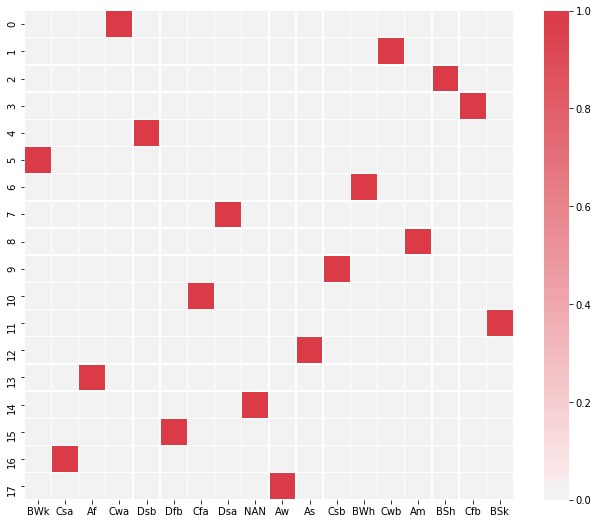

In [78]:
# Visualising the result
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240,10,as_cmap=True)
sns.heatmap(result,cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, xticklabels=x_axis_labels)


In [79]:
#Percentage of matching points 
n_points = np.sum(w)
print("Percentage of matching points: %.4f"%(matching_points/n_points))

Percentage of matching points: 0.4075
